# Exploring FIRM-NASA Fire Alerts Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msn

---

# IMPORT

In [5]:
DL_FIRE_M_C61_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_nrt_M-C61_591394.csv", parse_dates=["acq_date"])
DL_FIRE_M_C61_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_archive_M-C61_591394.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_NOAA20_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_nrt_J1V-C2_591395.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_NOAA20_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_archive_J1V-C2_591395.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_NOAA21_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J2V-C2_591396/fire_nrt_J2V-C2_591396.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_SNNP_nrt = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_SV-C2_591397/fire_nrt_SV-C2_591397.csv", parse_dates=["acq_date"])
DL_FIRE_VIIRS_SNNP_arc = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_SV-C2_591397/fire_archive_SV-C2_591397.csv", parse_dates=["acq_date"])

In [6]:
DL_FIRE = pd.concat(
    [
        # DL_FIRE_M_C61_nrt, 
        # DL_FIRE_M_C61_arc,
        DL_FIRE_VIIRS_NOAA20_nrt,
        DL_FIRE_VIIRS_NOAA20_arc,
        DL_FIRE_VIIRS_NOAA21_nrt,
        DL_FIRE_VIIRS_SNNP_nrt,
        DL_FIRE_VIIRS_SNNP_arc
    ], 
    axis=0
).sort_values(by="acq_date", ascending=False).reset_index(drop=True)

DL_FIRE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500896 entries, 0 to 3500895
Data columns (total 15 columns):
 #   Column      Dtype         
---  ------      -----         
 0   latitude    float64       
 1   longitude   float64       
 2   brightness  float64       
 3   scan        float64       
 4   track       float64       
 5   acq_date    datetime64[ns]
 6   acq_time    int64         
 7   satellite   object        
 8   instrument  object        
 9   confidence  object        
 10  version     object        
 11  bright_t31  float64       
 12  frp         float64       
 13  daynight    object        
 14  type        float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(5)
memory usage: 400.6+ MB


In [7]:
DL_FIRE

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,17.67810,100.71805,330.45,0.39,0.37,2025-03-20,635,N,VIIRS,n,2.0NRT,296.39,1.12,D,NaN
1,19.39021,98.02483,331.70,0.39,0.44,2025-03-20,659,N20,VIIRS,l,2.0NRT,304.45,1.73,D,NaN
2,15.47269,103.92846,349.51,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,297.54,9.06,D,NaN
3,15.47313,103.93243,352.87,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,296.41,9.43,D,NaN
4,15.46179,103.93364,338.02,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,295.71,5.15,D,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500891,16.09800,99.77119,328.34,0.59,0.70,2012-01-20,725,N,VIIRS,n,2,285.92,6.15,D,0.0
3500892,16.53583,99.41296,331.31,0.57,0.69,2012-01-20,725,N,VIIRS,n,2,284.83,3.79,D,0.0
3500893,18.04026,98.74612,333.39,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,293.38,10.00,D,0.0
3500894,18.03988,98.74202,352.30,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,294.78,12.62,D,0.0


# EXPLORE

In [8]:
cat_cols = ["satellite", "instrument", "confidence", "version", "daynight", "type"]
num_cols = ["brightness", "scan", "track", "bright_t31", "frp"]

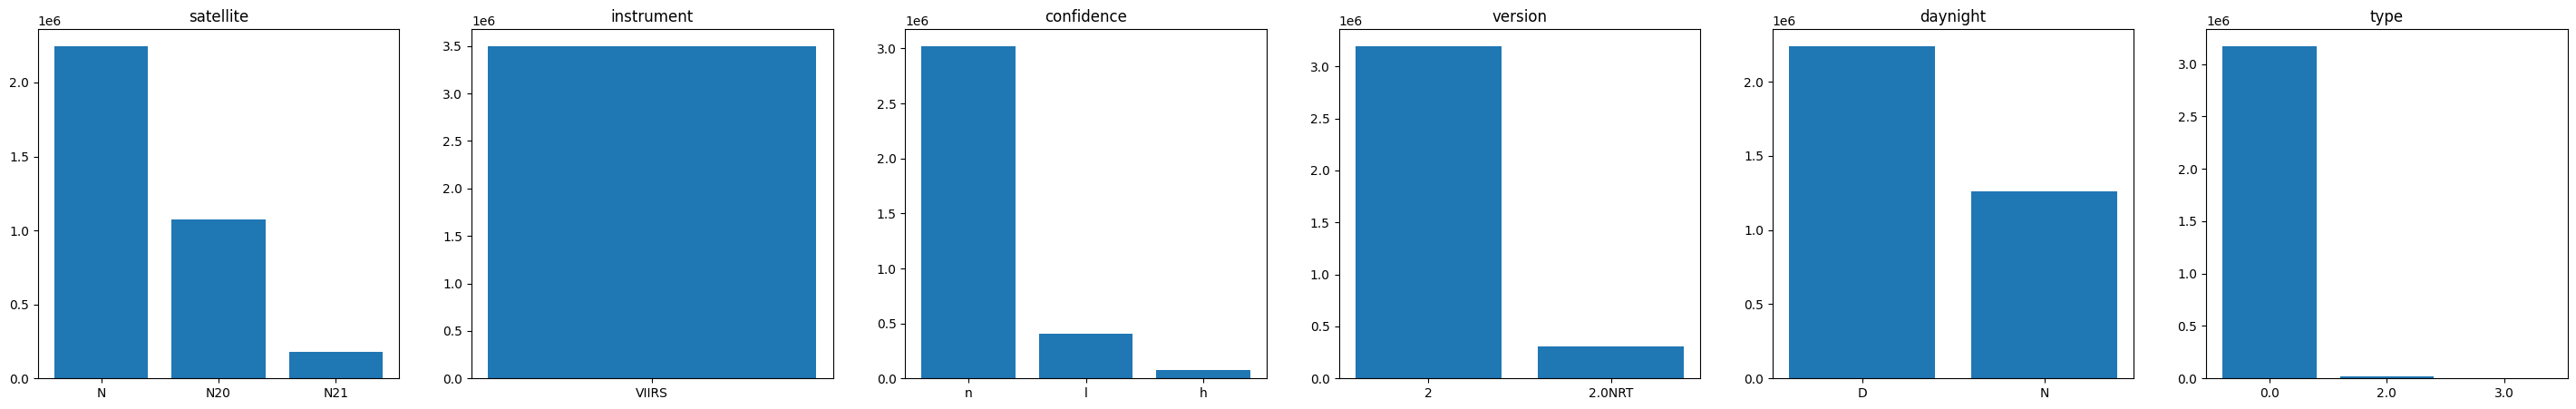

In [9]:
fig, axs = plt.subplots(1, len(cat_cols), figsize=(6*len(cat_cols), 5))

for col, ax in zip(cat_cols, axs):
    counts = DL_FIRE[col].value_counts()
    ax.bar(height=counts.values, x=counts.index.astype("string"))
    ax.set(title=col)

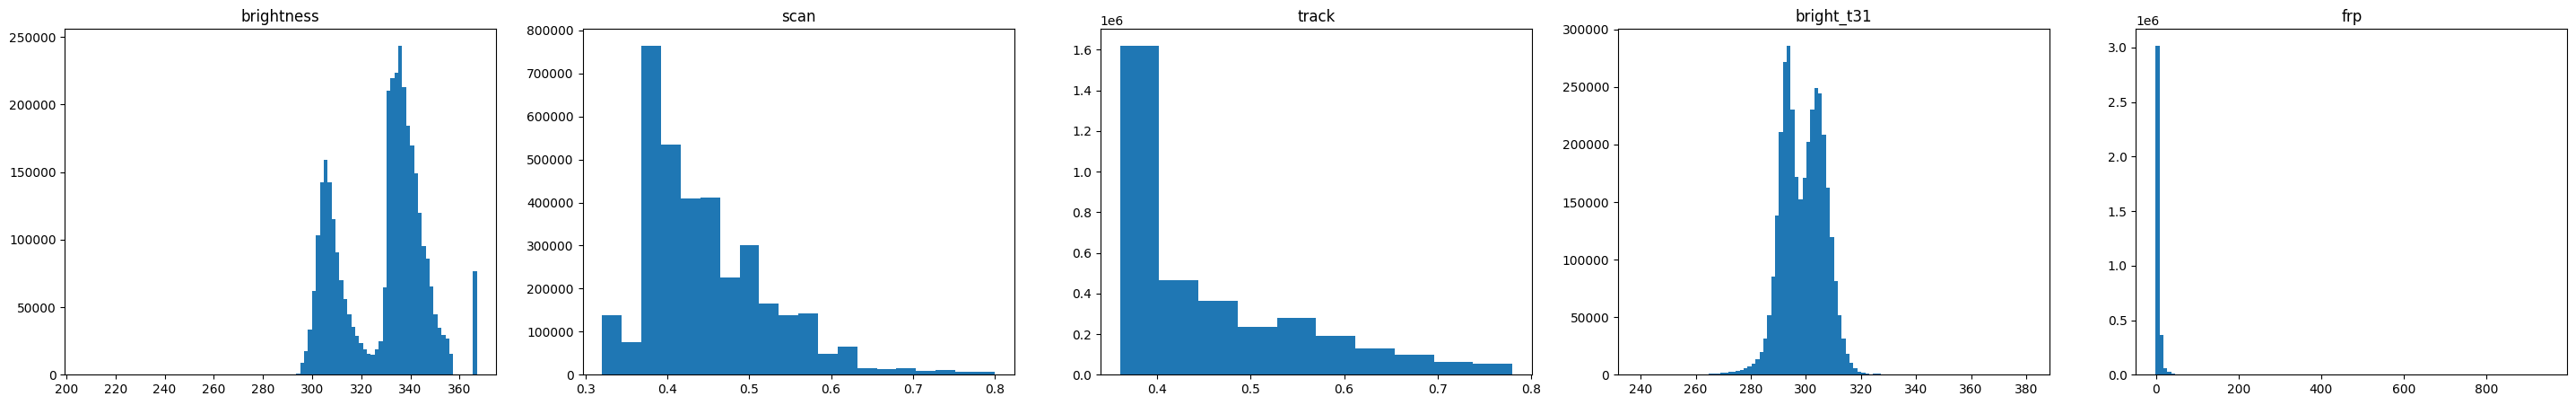

In [10]:
fig, axs = plt.subplots(1, len(num_cols), figsize=(6*len(cat_cols), 5))

bin_n = [100, 20, 10, 100, 100, 20]

for col, ax, b in zip(num_cols, axs, bin_n):
    ax.hist(DL_FIRE[col], bins=b)
    ax.set(title=col)

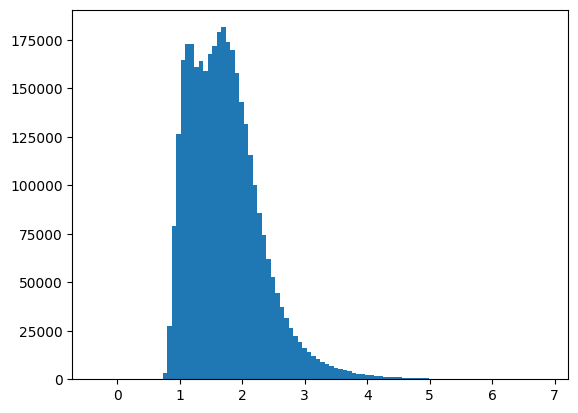

In [11]:
DL_FIRE["ln_frp"] = np.log(DL_FIRE["frp"] + 2)
plt.hist(DL_FIRE["ln_frp"], bins=100);

In [12]:
DL_FIRE.isna().sum()

latitude           0
longitude          0
brightness         0
scan               0
track              0
acq_date           0
acq_time           0
satellite          0
instrument         0
confidence         0
version            0
bright_t31         0
frp                0
daynight           0
type          304257
ln_frp             0
dtype: int64

In [13]:
corr_mat = DL_FIRE.corr(numeric_only=True)
num_col = np.astype(corr_mat.index.values, object)
corr_mat

,latitude,longitude,brightness,scan,track,acq_time,bright_t31,frp,type,ln_frp
latitude,1.000000,-0.271835,-0.087466,-0.006100,-0.025051,0.102744,0.040107,0.008619,-0.101178,-0.028660
longitude,-0.271835,1.000000,0.106952,0.029408,0.045743,-0.131682,-0.005339,-0.016380,0.021928,0.043802
brightness,-0.087466,0.106952,1.000000,-0.016203,0.056587,-0.860152,0.714073,0.370642,-0.086355,0.755683
scan,-0.006100,0.029408,-0.016203,1.000000,0.441214,-0.004327,-0.099281,0.109463,0.012323,0.189648
track,-0.025051,0.045743,0.056587,0.441214,1.000000,-0.033832,-0.209750,0.078447,0.011909,0.131413
acq_time,0.102744,-0.131682,-0.860152,-0.004327,-0.033832,1.000000,-0.712233,-0.276391,0.096528,-0.623253
bright_t31,0.040107,-0.005339,0.714073,-0.099281,-0.209750,-0.712233,1.000000,0.323985,-0.089835,0.565247
frp,0.008619,-0.016380,0.370642,0.109463,0.078447,-0.276391,0.323985,1.000000,-0.029127,0.724314
type,-0.101178,0.021928,-0.086355,0.012323,0.011909,0.096528,-0.089835,-0.029127,1.000000,-0.059892
ln_frp,-0.028660,0.043802,0.755683,0.189648,0.131413,-0.623253,0.565247,0.724314,-0.059892,1.000000


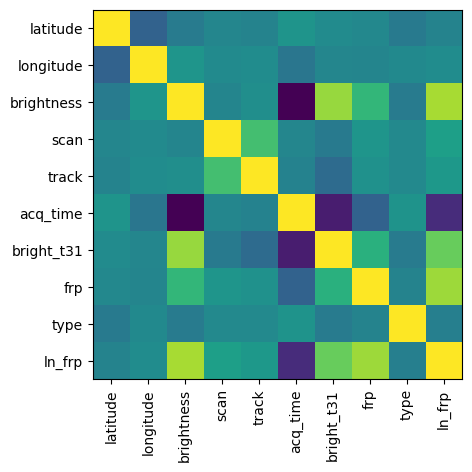

In [14]:
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(num_col)), labels=num_col, rotation=90)
plt.yticks(ticks=range(len(num_col)), labels=num_col);

In [15]:
DL_FIRE_hc = DL_FIRE[(DL_FIRE["confidence"] == 'h') | (DL_FIRE["confidence"] == 'n')]
DL_FIRE_hc

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,ln_frp
0,17.67810,100.71805,330.45,0.39,0.37,2025-03-20,635,N,VIIRS,n,2.0NRT,296.39,1.12,D,NaN,1.137833
2,15.47269,103.92846,349.51,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,297.54,9.06,D,NaN,2.403335
3,15.47313,103.93243,352.87,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,296.41,9.43,D,NaN,2.436241
4,15.46179,103.93364,338.02,0.42,0.61,2025-03-20,659,N20,VIIRS,n,2.0NRT,295.71,5.15,D,NaN,1.967112
5,14.81930,98.66633,333.13,0.56,0.43,2025-03-20,659,N20,VIIRS,n,2.0NRT,301.95,4.73,D,NaN,1.906575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500891,16.09800,99.77119,328.34,0.59,0.70,2012-01-20,725,N,VIIRS,n,2,285.92,6.15,D,0.0,2.098018
3500892,16.53583,99.41296,331.31,0.57,0.69,2012-01-20,725,N,VIIRS,n,2,284.83,3.79,D,0.0,1.756132
3500893,18.04026,98.74612,333.39,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,293.38,10.00,D,0.0,2.484907
3500894,18.03988,98.74202,352.30,0.53,0.67,2012-01-20,725,N,VIIRS,n,2,294.78,12.62,D,0.0,2.682390


In [16]:
DL_FIRE_bgd = DL_FIRE_hc.groupby("acq_date")

Text(0.5, 1.0, 'Number of Fire Alert over Time')

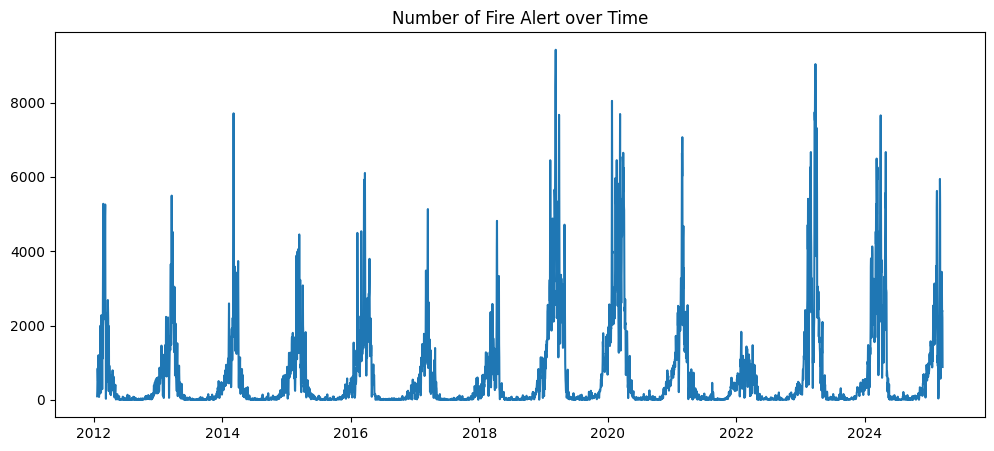

In [17]:
plt.figure(figsize=(12,5))
plt.plot(DL_FIRE_bgd["acq_date"].aggregate(["count"]))
plt.title("Number of Fire Alert over Time")

,mean,min,max
acq_date,,,
2012-01-20,332.365158,295.58,367.0
2012-01-21,332.754018,296.77,367.0
2012-01-22,331.887228,295.27,367.0
2012-01-23,330.331124,296.47,367.0
2012-01-24,331.605170,296.63,367.0
...,...,...,...
2025-03-16,321.527804,295.05,367.0
2025-03-17,319.273354,295.18,367.0
2025-03-18,321.533899,295.19,367.0


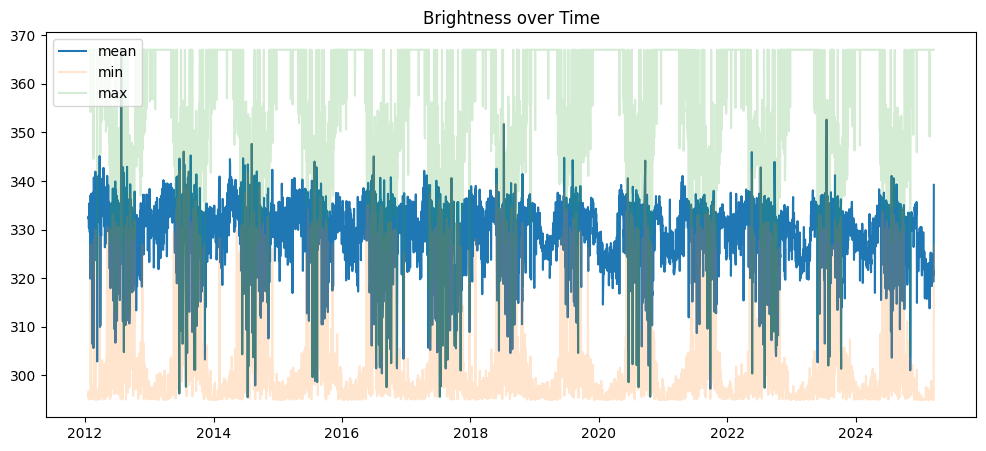

In [18]:
brightness = DL_FIRE_bgd["brightness"].aggregate(["mean", "min", "max"])

plt.figure(figsize=(12,5))
plt.plot(brightness["mean"], label="mean")
plt.plot(brightness["min"], alpha=0.2, label="min")
plt.plot(brightness["max"], alpha=0.2, label="max")
plt.title("Brightness over Time")
plt.legend()

brightness